In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("datasets_33080_1320127_car data.csv")
data.drop(['Car_Name'],axis=1,inplace=True)
data["Current_year"]=2020
data['No of Years']=data['Current_year']-data['Year']

In [3]:
data.drop(['Year','Current_year'],axis=1,inplace=True)

data=pd.get_dummies(data,drop_first=True)



In [4]:
print(data.corr())

                        Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
No of Years                 -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        No of Years  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price             -0.236141          0.552339         -0.540571   
Present_Price              0.047584          0.473306         -0.4652

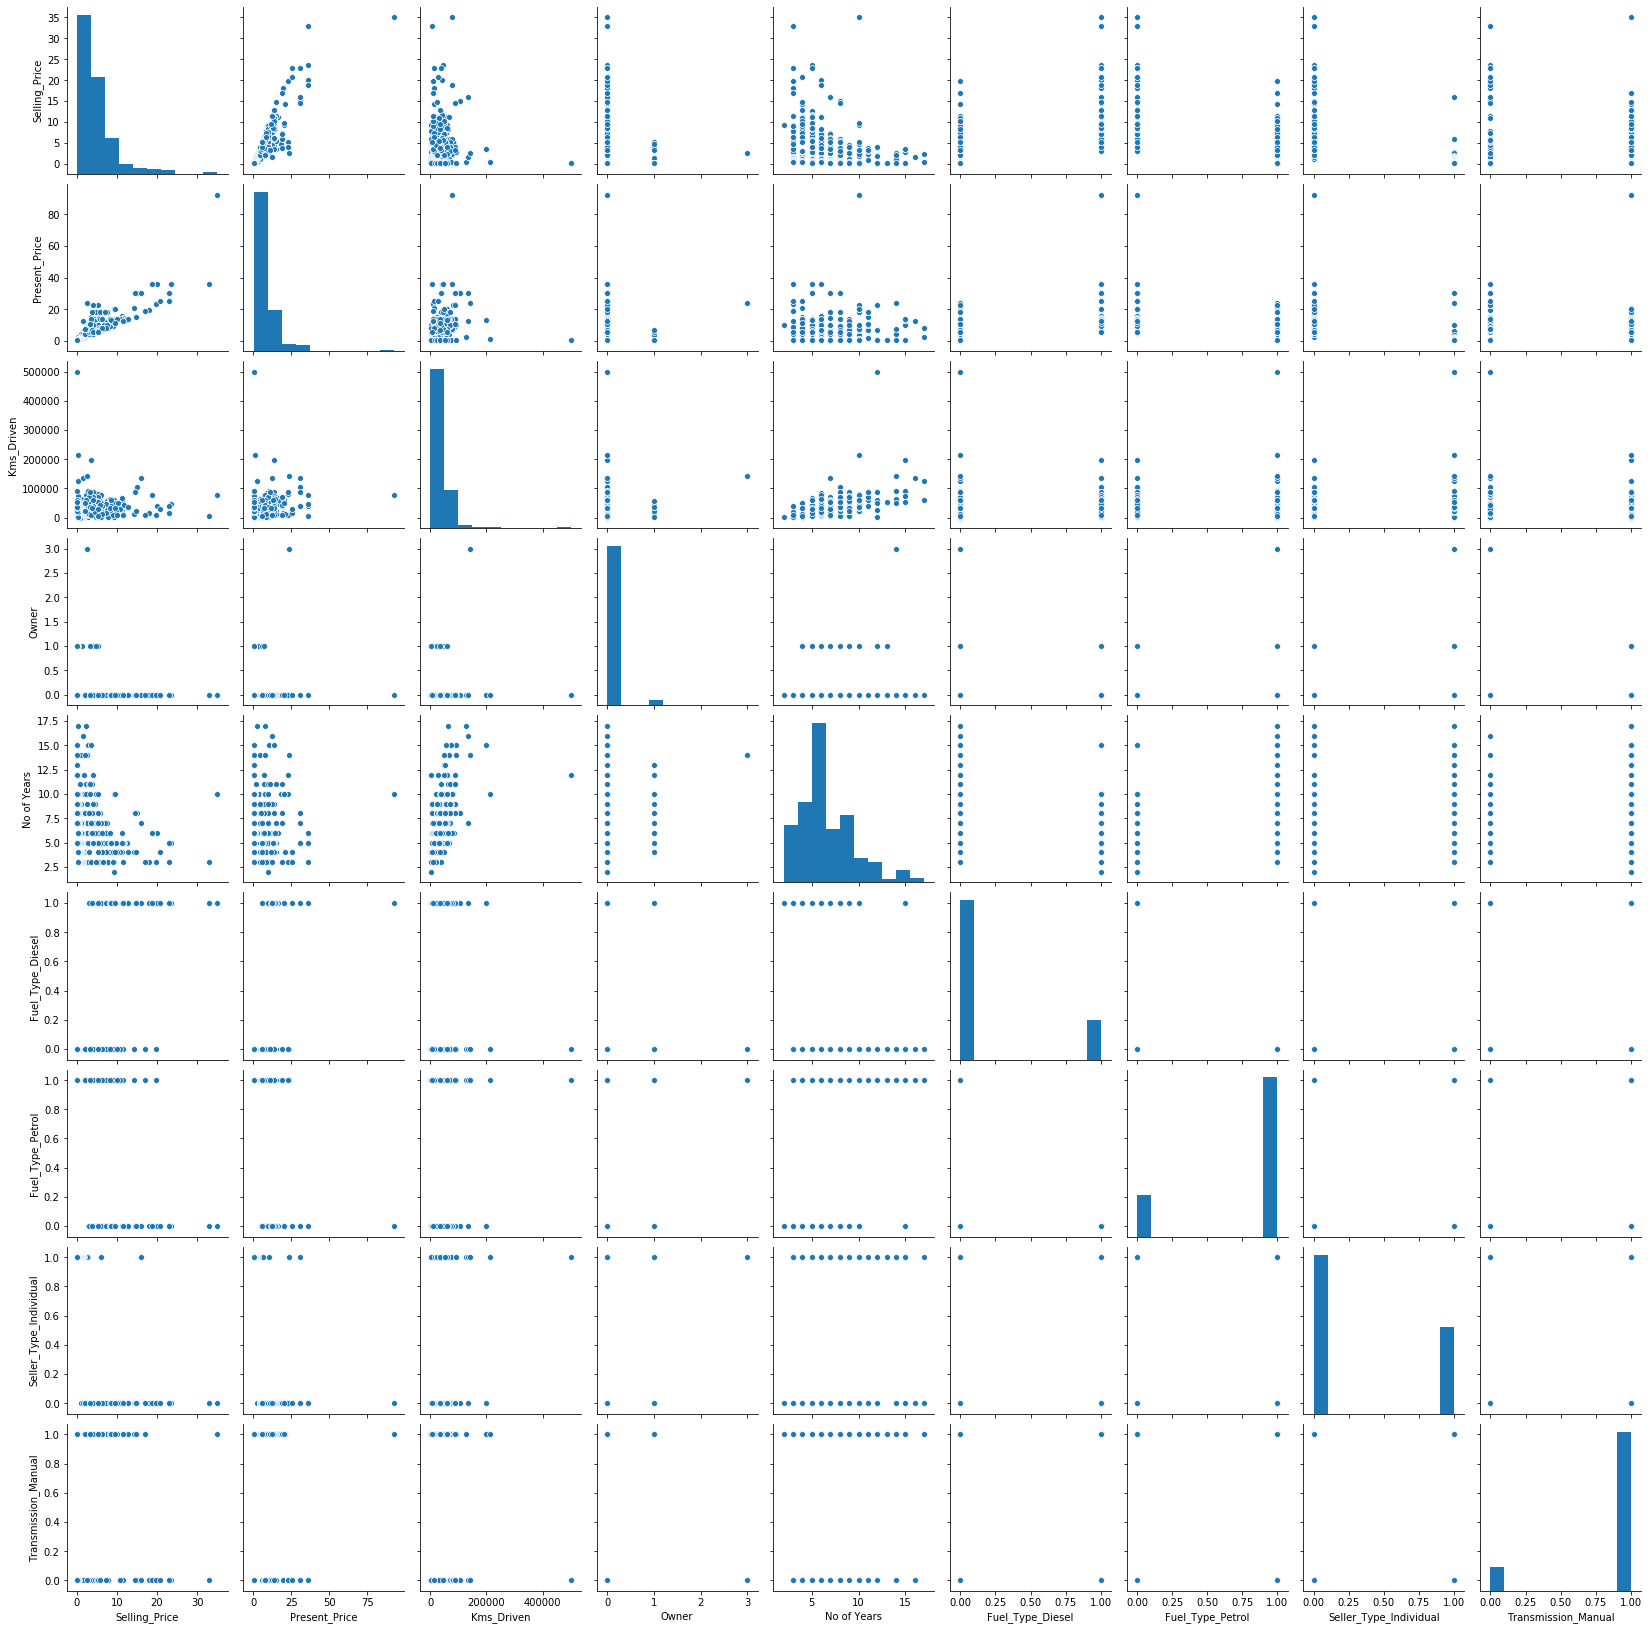

In [5]:
sns.pairplot(data)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

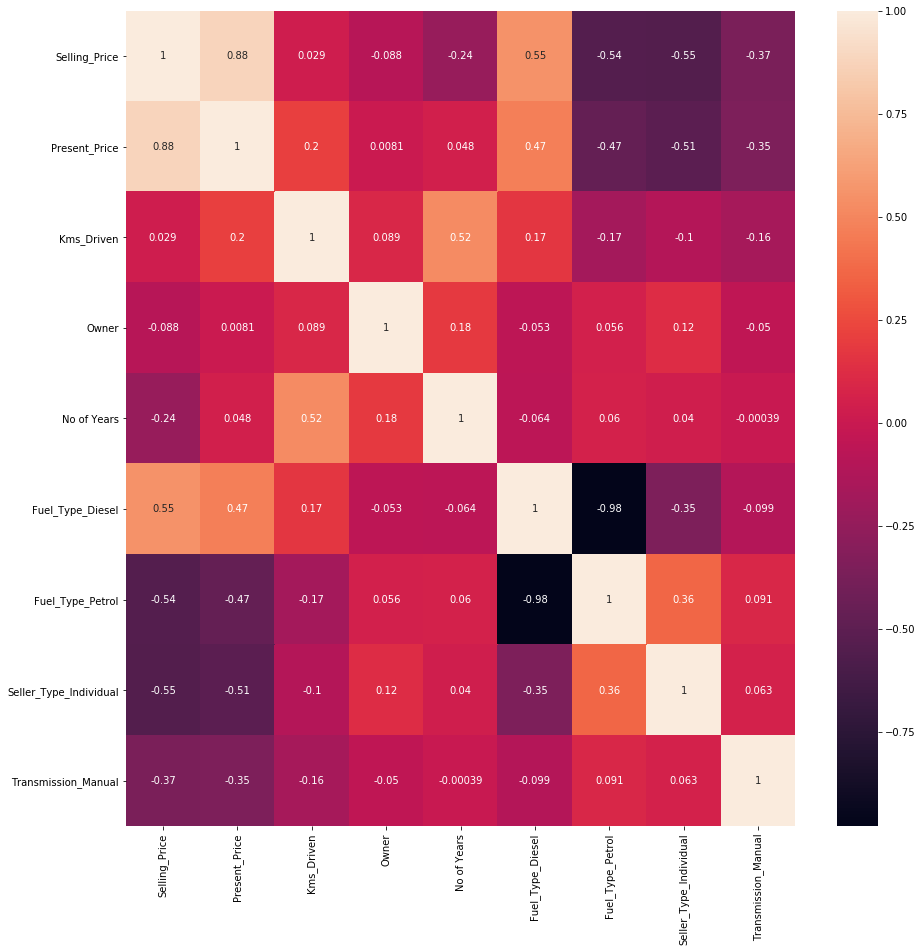

In [10]:
cor=data.corr()
fe=cor.index
plt.figure(figsize=(15,15))
g=sns.heatmap(data[fe].corr(),annot=True)

In [11]:
x=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']


In [18]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [13]:
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.37719312 0.04030527 0.0003781  0.0777772  0.22328133 0.00938872
 0.12891936 0.14275689]


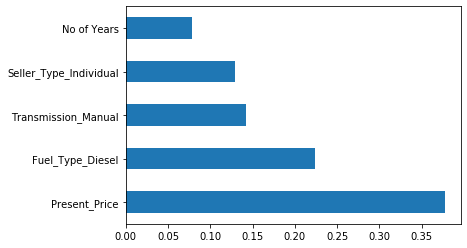

In [14]:
fet=pd.Series(model.feature_importances_,index=x.columns)
fet.nlargest(5).plot(kind='barh')
plt.show()

In [16]:
import sklearn
from sklearn import model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
print(x_train,y_train)


     Present_Price  Kms_Driven  Owner  No of Years  Fuel_Type_Diesel  \
131           0.82       18000      0            5                 0   
231           9.40       15001      0            3                 0   
140           1.20       32000      0            7                 0   
207           5.70       34797      0            5                 0   
166           0.55        1000      0            4                 0   
..             ...         ...    ...          ...               ...   
255           5.35       53675      0            8                 0   
38            3.76       10079      0            4                 0   
7             8.61       33429      0            5                 1   
136           1.20       23500      0            6                 0   
63           35.96       47000      0            5                 1   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
131                 1                       1                    1

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
cls=DecisionTreeRegressor()

cls.fit(x_train,y_train)

pre=cls.predict(x_test)

In [31]:
pre

array([ 0.3 ,  0.75,  4.5 , 14.5 ,  6.7 , 14.73,  0.31,  9.7 ,  4.4 ,
        2.25,  5.5 ,  0.78,  0.12,  0.6 ,  5.5 ,  0.72,  9.7 ,  3.75,
        7.25,  5.95,  0.3 ,  3.25,  8.55,  4.5 ,  0.3 ,  2.  , 14.5 ,
        4.5 ,  0.75,  0.6 ,  0.1 ])

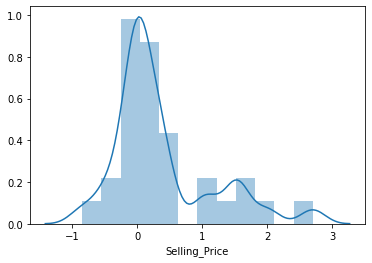

In [32]:
sns.distplot(y_test-pre)

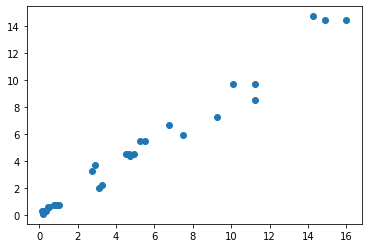

In [33]:
plt.scatter(y_test,pre)